In [ ]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
import os
path=os.listdir(r'/content/drive/MyDrive/BrainTumor/DWTImages/training')
classes={'glioma_tumor':0,'meningioma_tumor':1,'no_tumor':2,'pituitary_tumor':3}

In [ ]:
#appending inputs into X and output, targets into Y.
import cv2
X=[]
Y=[]
for cls in classes:
    pth=(r'/content/drive/MyDrive/BrainTumor/DWTImages/training/')+cls
    for j in os.listdir(pth):
        img=cv2.imread(pth+'/'+j, 0)
        img=cv2.resize(img,(200,200))
        X.append(img)
        Y.append(classes[cls])

In [ ]:
np.unique(Y)

array([0, 1, 2, 3])

In [ ]:
X=np.array(X)
Y=np.array(Y)

In [ ]:
pd.Series(Y).value_counts()

0    826
3    815
1    689
2    388
dtype: int64

In [ ]:
X.shape

(2718, 200, 200)

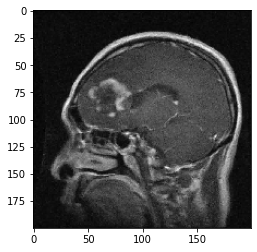

In [ ]:
plt.imshow(X[0],cmap='gray')

In [ ]:
X_updated=X.reshape(len(X),-1)
X_updated.shape

(2718, 40000)

In [ ]:
xtrain,xtest,ytrain,ytest=train_test_split(X_updated,Y,random_state=10,test_size=.10)

In [ ]:
xtrain.shape,xtest.shape

((2446, 40000), (272, 40000))

In [ ]:
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())
xtrain=xtrain/255
xtest=xtest/255
print(xtrain.max(),xtrain.min())
print(xtest.max(),xtest.min())

255 0
255 0
1.0 0.0
1.0 0.0


In [ ]:
from sklearn.decomposition import PCA

In [ ]:
print(xtrain.shape,xtest.shape)

pca=PCA(.98)
#pca_train=pca.fit_transform(xtrain)
#pca_test=pca.transform(xtest)
pca_train=xtrain
pca_test=xtest

(2446, 40000) (272, 40000)


In [ ]:
#print(pca_train.shape,pca_test.shape)
#print(pca.n_components_)
#print(pca.n_features)

In [ ]:
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.neighbors import KNeighborsClassifier

In [ ]:
lg=LogisticRegression()
lg.fit(pca_train,ytrain)

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,


LogisticRegression()

In [ ]:
sv=SVC()
sv.fit(pca_train,ytrain)

SVC()

In [ ]:
knn=KNeighborsClassifier(n_neighbors=3)
knn.fit(pca_train,ytrain)

KNeighborsClassifier(n_neighbors=3)

In [ ]:
print("Training score:",lg.score(pca_train,ytrain))
print("Testing score:",lg.score(pca_test,ytest))

Training score: 1.0
Testing score: 0.8602941176470589


In [ ]:
print("Training score:",sv.score(pca_train,ytrain))
print("Testing score:",sv.score(pca_test,ytest))

Training score: 0.9611610793131643
Testing score: 0.875


In [ ]:
print("Training score:",knn.score(pca_train,ytrain))
print("Testing score:",knn.score(pca_test,ytest))

Training score: 0.9591169255928046
Testing score: 0.8639705882352942


In [ ]:
pred=sv.predict(pca_test)
#printing indexes of misclassifications
np.where(ytest!=pred)

(array([  0,   1,   3,  10,  17,  27,  33,  35,  42,  53,  75,  94,  98,
         99, 111, 113, 117, 118, 123, 144, 151, 155, 158, 191, 196, 206,
        209, 218, 220, 235, 247, 255, 256, 267]),)

In [ ]:
pred[6]

0

In [ ]:
ytest[6]

0

In [ ]:
#TEST MODEL

In [ ]:
dec={0:'glioma_tumor',1:'meningioma_tumor',2:'no_tumor',3:'pituitary_tumor'}

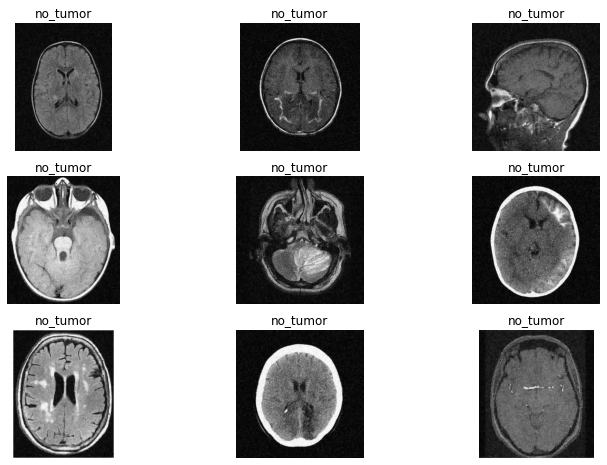

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir(r'/content/drive/MyDrive/BrainTumor/DWTImages/testing/')
c=1
for i in os.listdir(r'/content/drive/MyDrive/BrainTumor/DWTImages/testing/no_tumor/')[:9]:
    plt.subplot(3,3,c)
    
    img=cv2.imread(r'/content/drive/MyDrive/BrainTumor/DWTImages/testing/no_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1 

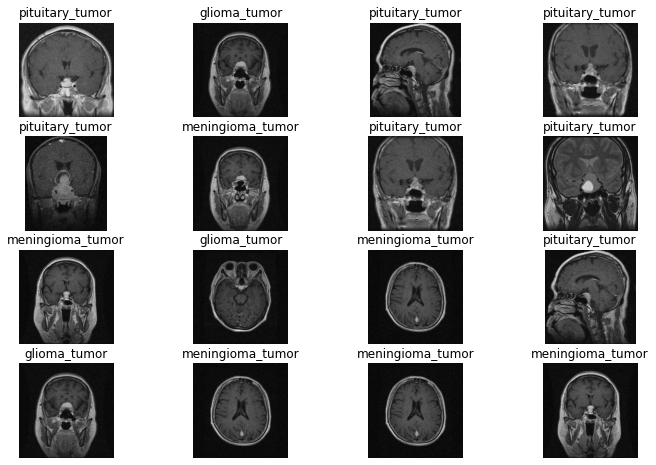

In [ ]:
plt.figure(figsize=(12,8))
p=os.listdir(r'/content/drive/MyDrive/BrainTumor/DWTImages/testing/')
c=1
for i in os.listdir(r'/content/drive/MyDrive/BrainTumor/DWTImages/testing/pituitary_tumor/')[:16]:
    plt.subplot(4,4,c)
    
    img=cv2.imread(r'/content/drive/MyDrive/BrainTumor/DWTImages/testing/pituitary_tumor/'+i,0)
    img1=cv2.resize(img,(200,200))
    img1=img1.reshape(1,-1)/255
    p=sv.predict(img1)
    plt.title(dec[p[0]])
    plt.imshow(img,cmap='gray')
    plt.axis('off')
    c+=1

In [ ]:
from sklearn.metrics import confusion_matrix,accuracy_score,roc_curve,roc_auc_score,classification_report,f1_score

In [ ]:
predicted_labels = sv.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[54 12  0  1]
 [ 7 67  0  7]
 [ 4  0 33  0]
 [ 2  1  0 84]]


In [ ]:
predicted_labels = knn.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[57  2  8  0]
 [13 56  9  3]
 [ 0  0 37  0]
 [ 2  0  0 85]]


In [ ]:
predicted_labels = lg.predict(xtest)
cnf_matrix = confusion_matrix(ytest, predicted_labels)
print(cnf_matrix)

[[53 13  0  1]
 [12 59  6  4]
 [ 0  0 37  0]
 [ 1  1  0 85]]


In [ ]:
import six
import sys
sys.modules['sklearn.externals.six'] = six
from mlxtend.classifier import StackingCVClassifier

In [ ]:
scv=StackingCVClassifier(classifiers=[lg,knn,sv],meta_classifier=knn)
scv.fit(xtrain,ytrain)
scv_predicted = scv.predict(xtest)
scv_conf_matrix = confusion_matrix(ytest,scv_predicted)
scv_acc_score = accuracy_score(ytest, scv_predicted)
scv_f1_score = f1_score(ytest, scv_predicted,average='micro')

print("confusion matrix")
print(scv_conf_matrix)
print("\n")
print("Accuracy of StackingCVClassifier:",scv_acc_score*100,'\n')
print(classification_report(ytest,scv_predicted))

/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG,
/usr/local/lib/python3.7/dist-packages/sklearn/linear_model/_logistic.py:818: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


confusion matrix
[[49 18  0  0]
 [ 6 72  3  0]
 [ 0  0 37  0]
 [ 1  1  0 85]]


Accuracy of StackingCVClassifier: 89.33823529411765 

              precision    recall  f1-score   support

           0       0.88      0.73      0.80        67
           1       0.79      0.89      0.84        81
           2       0.93      1.00      0.96        37
           3       1.00      0.98      0.99        87

    accuracy                           0.89       272
   macro avg       0.90      0.90      0.90       272
weighted avg       0.90      0.89      0.89       272



In [ ]:
cm = confusion_matrix(ytest, scv_predicted)
classes = ['Glioma','Meningioma','No tumor','Pituitary']

In [ ]:
def plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix',
                          cmap=plt.cm.Blues):
    """
    This function prints and plots the confusion matrix.
    Normalization can be applied by setting `normalize=True`.
    """
    if normalize:
        cm = cm.astype('float') / cm.sum(axis=1)[:, np.newaxis]
        print("Normalized confusion matrix")
    else:
        print('Confusion Matrix, without normalization')

    print(cm)

    plt.imshow(cm, interpolation='nearest', cmap=cmap)
    plt.title(title)
    plt.colorbar()
    tick_marks = np.arange(len(classes))
    plt.xticks(tick_marks, classes, rotation=45)
    plt.yticks(tick_marks, classes)

    fmt = '.2f' if normalize else 'd'
    thresh = cm.max() / 2.
    for i, j in itertools.product(range(cm.shape[0]), range(cm.shape[1])):
        plt.text(j, i, format(cm[i, j], fmt),
                 horizontalalignment="center",
                 color="white" if cm[i, j] > thresh else "black")

    plt.tight_layout()
    plt.ylabel('True label')
    plt.xlabel('Predicted label')   

Confusion Matrix, without normalization
[[49 18  0  0]
 [ 6 72  3  0]
 [ 0  0 37  0]
 [ 1  1  0 85]]


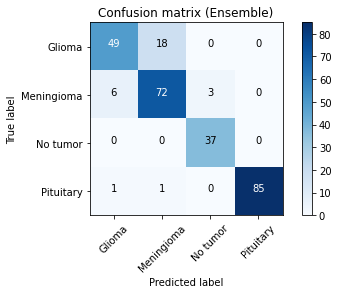

In [ ]:
import itertools
plot=plot_confusion_matrix(cm, classes,
                          normalize=False,
                          title='Confusion matrix (Ensemble)',
                          cmap=plt.cm.Blues)